In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook 

### GD

In [3]:
def function(x):
    return ((x-5)**2 - 20)

In [4]:
def d_function(x):
    return 2*(x-5)

In [5]:
x = np.linspace(-10, 20, 200)
y = function(x)

<IPython.core.display.Javascript object>


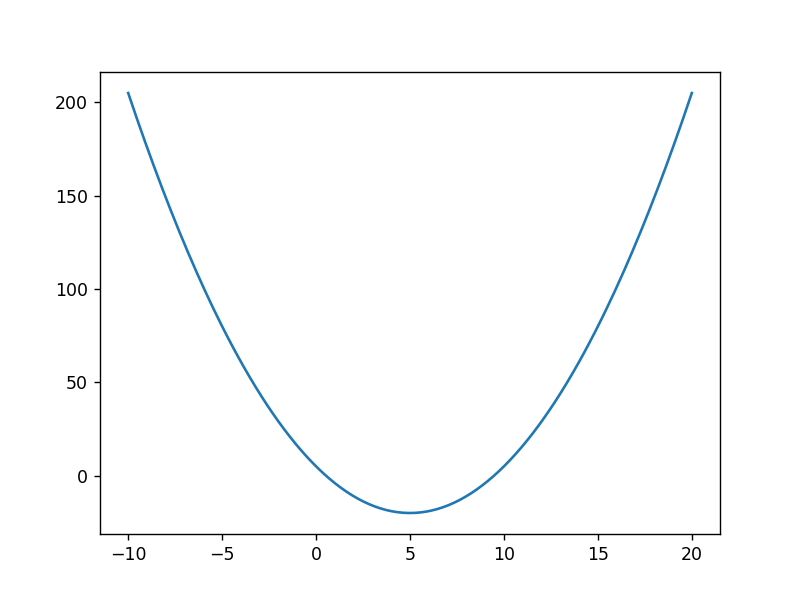

In [6]:
plt.close()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


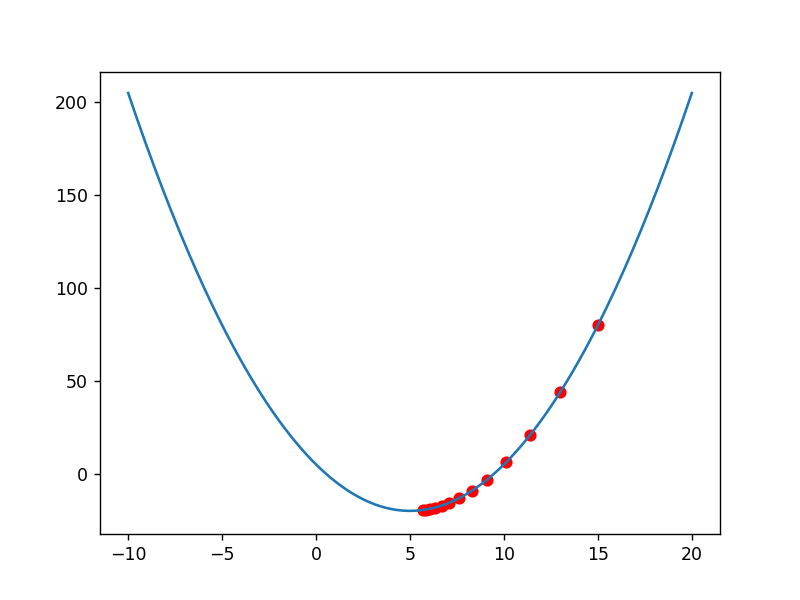

In [16]:
import matplotlib.animation as animation

plt.close()
fig = plt.figure()

def grad_descend_step(param, lr):
    global ax
    y_param = function(param)
    ax.scatter(param, y_param, color = 'red')
    return param - lr * d_function(param)

def animate(i):
    global x_0, ax
    if i % 20 == 0:
        x_0 = 15
        ax.clear()
        ax.plot(x, y)
    x_0 = grad_descend_step(x_0, 0.1)

x_0 = 15
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

anim = animation.FuncAnimation(fig, animate, frames=20, interval=500, repeat=True, repeat_delay=2000)

### SGD vs GD

<IPython.core.display.Javascript object>


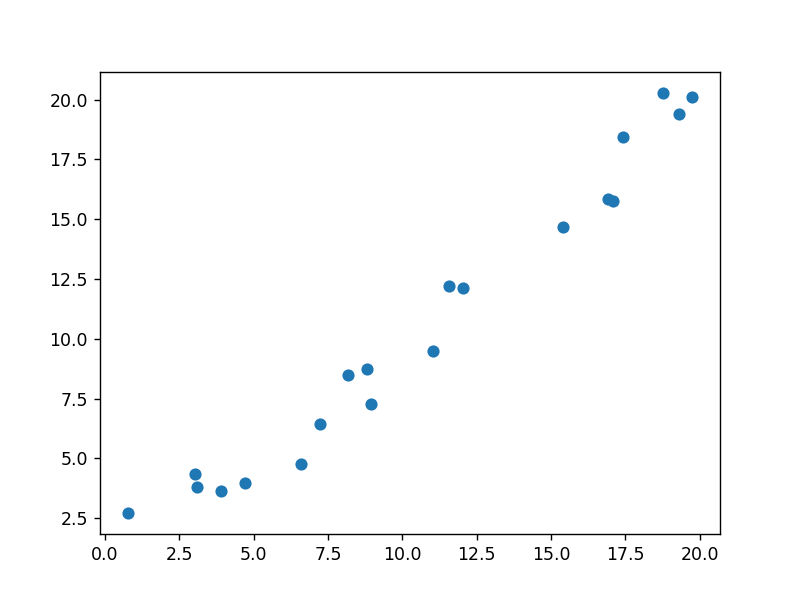

In [8]:
point_count = 20
x = np.random.uniform(0, 20, size=(point_count,))
y = x + np.random.randn(point_count)

plt.close()
plt.scatter(x, y)
plt.show()

In [9]:
def evaluate(W, b, x):
    return W*x + b

#### lets define function we want to minimize, in most cases we will call this function loss function, but now for sake of clarity leave as it is

In [10]:
def mean_square_dist(W, b, x, y): # function we want to minimize, in most cases called 
    
    y_hat = evaluate(W, b, x)
    
    dists = (y_hat - y)**2
    
    return dists.mean()

#### As was discussed previously lets define derivative of the function we want to minimize, w.r.t. every parameter (W, b)

In [11]:
def d_W(W, b, x, y):
    y_hat = evaluate(W, b, x)
    
    error = 2*(y_hat-y)*x
    
    return error.mean()

def d_b(W, b, x, y):
    y_hat = evaluate(W, b, x)
    
    error = 2*(y_hat-y)
    return error.mean()

def d_mean_square_dist(W, b, x, y):
    return (d_W(W, b, x, y), d_b(W, b, x, y))

In [12]:
W = np.random.rand()
b = 0

<IPython.core.display.Javascript object>


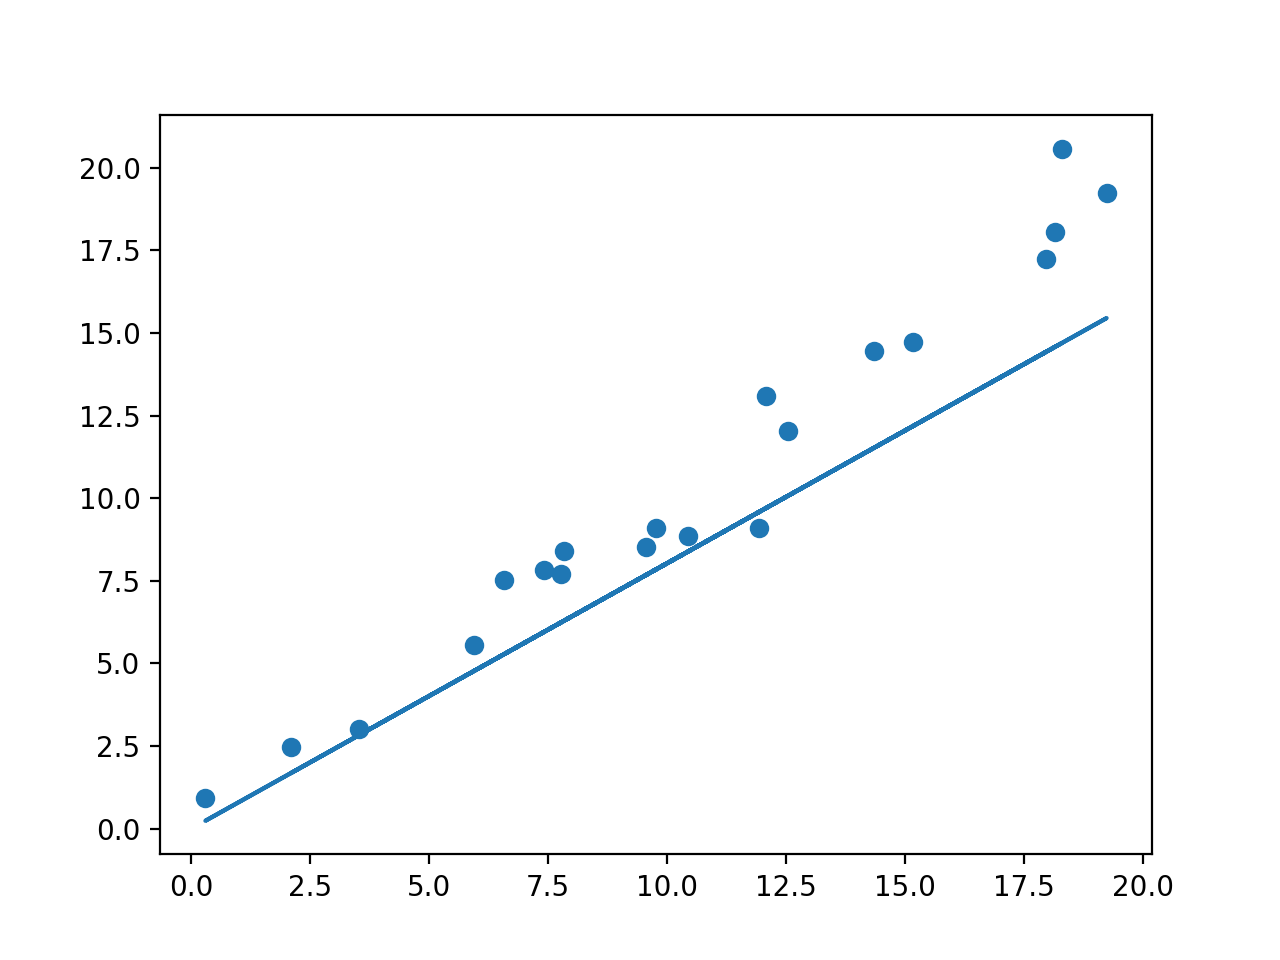

5.93179520644471

In [13]:
plt.close()
plt.scatter(x, y)
plt.plot(x, evaluate(W, b, x))
plt.show()

mean_square_dist(W, b, x, y)

### GD

<IPython.core.display.Javascript object>


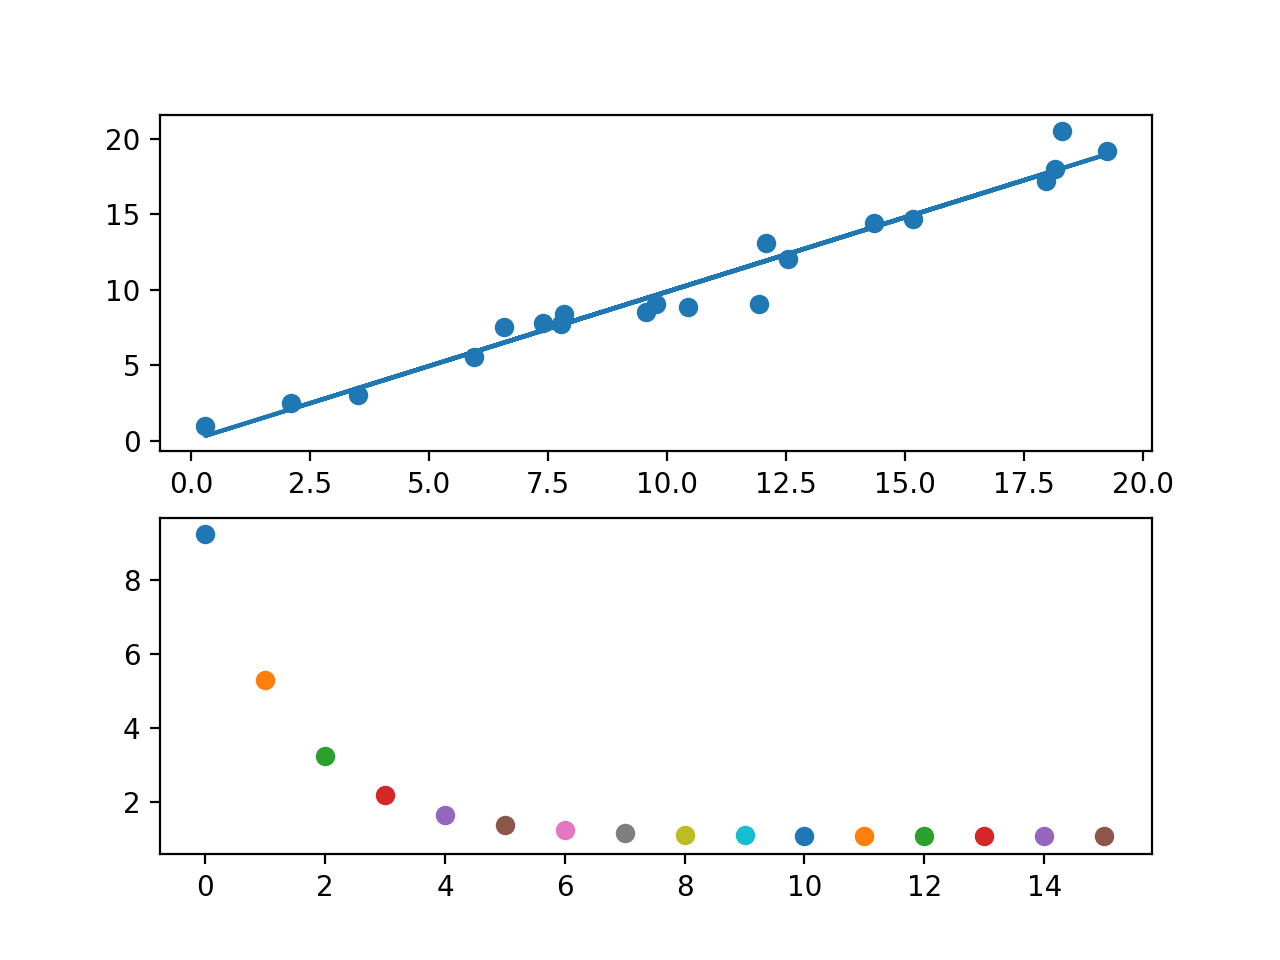

In [14]:
plt.close()
fig = plt.figure()

def animate_gd(i):
    global W, b, ax1, ax2, num_steps
    
    if(i == 0):
        W = np.random.rand()
        b = 0
        ax2.clear()
        
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, evaluate(W, b, x))
    
    loss = mean_square_dist(W, b, x, y)
    ax2.scatter(i, loss)
    
    dW, db = d_mean_square_dist(W, b, x, y)
    
    W = W - lr*dW
    b = b - lr*db
    

lr = 0.001
num_steps = 20
W = np.random.rand()
b = 0

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

anim = animation.FuncAnimation(fig, animate_gd, frames=num_steps, interval=500, repeat=True, repeat_delay=2000)

### SGD

<IPython.core.display.Javascript object>


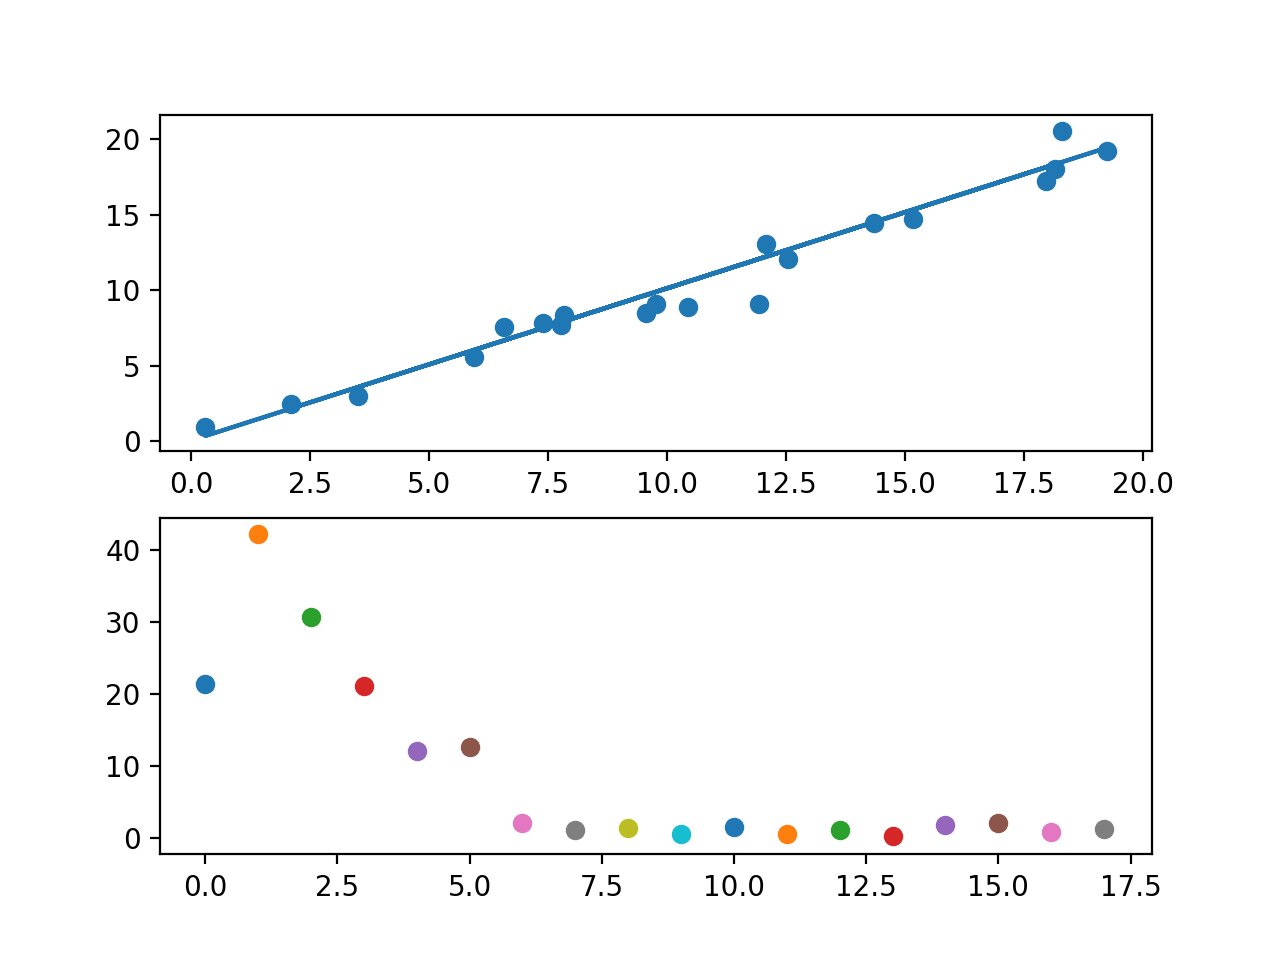

In [15]:
plt.close()
fig = plt.figure()

def animate_gd(i):
    global W, b, ax1, ax2, num_steps
    
    if(i == 0):
        W = np.random.rand()
        b = 0
        ax2.clear()
        
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, evaluate(W, b, x))
    
    idx = np.random.randint(0, len(x), batch_size)
    
    loss = mean_square_dist(W, b, x[idx], y[idx])
    ax2.scatter(i, loss)
    
    dW, db = d_mean_square_dist(W, b, x[idx], y[idx])
    
    W = W - lr*dW
    b = b - lr*db
    

lr = 0.001
num_steps = 20
W = np.random.rand()
b = 0
batch_size = 5

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

anim = animation.FuncAnimation(fig, animate_gd, frames=num_steps, interval=500, repeat=True, repeat_delay=2000)

As you can see we are using 4 times less computations while still aproaching minimum

##### Q1: how doest batch size influence training? 